# 描述性统计 Statistical Summary

* 这项工作主要是让我们知道数据的整体状况怎么样，描述这个数据的“样子”。
* 数据处理的最关键，也是最重要的第一步
* 了解数据的概况，有助于后续的数据分析和挖掘

**描述性统计的Python工具**
> PANDAS

> NumPy和SciPy
* count 统计非NA的数量
* describe 针对series或者DF的列计算汇总统计
* min max 最小值和最大值
* quantile 样本分位数
* sum 求和
* mean 均值
* median 中位数
* mad 根据均值计算平均绝对离差
* var 方差
* std 标准差
* skew 偏度（三阶矩）
* kurt 峰度
* cumsum 累计和
* cumprod 累计乘积
* diff 一阶差分
* pct_change 计算百分数变化
* mode 计算众数
* cov 协方差
* corrcoef 相关系数

In [91]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)


In [92]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [93]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [94]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [95]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [96]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame()
Quarter_data

,Raw_return
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [97]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame()
Year_data

,Raw_return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


## 均值 mean

算数平均：
$$A_n=\frac{a_1+a_2+a_3+\cdots+a_n}{n}$$

In [98]:
round(data_new['2000-01':'2024-09']['Raw_return'].mean(),5)

0.00026

In [99]:
#注意以下代码的书写逻辑，和上面的代码不同
np.mean(data_new['2000-01':'2024-09']['Raw_return'])

0.0002576419497498928

In [100]:
print('中国股票市场日度平均收益率为',data_new['2000-01':'2024-09']['Raw_return'].mean().round(5)*100,'%',sep="")

中国股票市场日度平均收益率为0.026%


In [101]:
print('中国股票市场月度平均收益率为',Month_data['2000-01':'2024-09']['Raw_return'].mean().round(3)*100,'%',sep="")

中国股票市场月度平均收益率为0.6%


In [102]:
print('中国股票市场年度平均收益率为',Year_data['2000':'2024']['Raw_return'].mean().round(5)*100,'%',sep="")

中国股票市场年度平均收益率为10.74%


In [103]:
sum(data_new['2000-01':'2024-09']['Raw_return']) / len(data_new['2000-01':'2024-09']['Raw_return'])

0.0002576419497498928

In [104]:
data_new['1995-01':'2024-09']['Raw_return'].describe()

count    6918.000000
mean        0.000370
std         0.016692
min        -0.163937
25%        -0.006790
50%         0.000510
75%         0.007758
max         0.309870
Name: Raw_return, dtype: float64

# 分位数 quantile

分位数（Quantile），亦称分位点，是指将一个随机变量的概率分布范围分为几个等份的数值点，常用的有中位数（即二分位数）、四分位数、百分位数等。

举例说明，我们班上有10名同学，他们的期末成绩是

【20，24，38，34，43，56，76，86，98，100】

如果期末考试要让40%的不通过，60%的人通过，分数线是多少呢？

常见的分类方法：

- 中位数 Median
  - 当N是奇数时
    - $$m_{0.5}=X_{(N+1) / 2}$$
  - 当N是偶数时
    - $$m_{0.5}=\frac{X_{(N / 2)}+X_{(N / 2+1)}}{2}$$
- 四分位数 Quartile
- 10分位数 常用在股票投资策略中

Some q-quantiles have special names:

- The only 2-quantile is called the median
- The 3-quantiles are called tertiles or terciles 
- The 4-quantiles are called quartiles 
- The 5-quantiles are called quintiles 
- The 6-quantiles are called sextiles 
- The 7-quantiles are called septiles
- The 8-quantiles are called octiles
- The 10-quantiles are called deciles
- The 12-quantiles are called duo-deciles or dodeciles
- The 16-quantiles are called hexadeciles
- The 20-quantiles are called ventiles, vigintiles, or demi-deciles 
- The 100-quantiles are called percentiles

In [105]:
len(data_new['1995-01':'2024-09'])

7223

In [106]:
len(data_new[data_new["Raw_return"] > 0])

3775

In [107]:
len(data_new[data_new["Raw_return"] > 0])/len(data_new)

0.5226360238128201

In [108]:
from statistics import quantiles

# quantiles函数里面的参数需要注意
quantiles(data_new['1995-01':'2024-09']['Raw_return'], n = 10, method='exclusive')

[-0.01627982595925277,
 -0.00891266760735836,
 -0.004910564933516537,
 -0.0019116496227742363,
 0.0004683483640481878,
 0.002848688258116505,
 0.005774506385657308,
 0.009791348801684752,
 0.017195204716027]

In [109]:
quantiles(data_new['1995-01':'2024-09']['Raw_return'], n = 10, method='inclusive')

[-0.016273486796843283,
 -0.008904480681335824,
 -0.0049105335359804995,
 -0.0019112410821794379,
 0.0004683483640481878,
 0.0028484509548271308,
 0.005764948233341815,
 0.009789313259894784,
 0.017182938215153553]

In [110]:
import statistics
help(statistics.quantiles)

Help on function quantiles in module statistics:

quantiles(data, *, n=4, method='exclusive')
    Divide *data* into *n* continuous intervals with equal probability.

    Returns a list of (n - 1) cut points separating the intervals.

    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.

    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.

    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.



In [111]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
q = statistics.quantiles(data, n=4, method='exclusive')
print(q)

[2.75, 5.5, 8.25]


In [112]:
q = statistics.quantiles(data, n=4, method='inclusive')
print(q)

[3.25, 5.5, 7.75]


In [113]:
Month_data['2000-01':'2024-09']['Raw_return'].describe()

count    297.000000
mean       0.005530
std        0.070834
min       -0.246314
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.274464
Name: Raw_return, dtype: float64

In [121]:
statistics.quantiles(Month_data['Raw_return'], n = 10, method='exclusive')

[-0.07509951200338086,
 -0.049078970439670154,
 -0.02727551483190027,
 -0.007864077660500212,
 0.004295591179114044,
 0.01985114557399421,
 0.036354767176530745,
 0.05593115044063066,
 0.10336924547079081]

In [122]:
len(Month_data['1995-01':'2024-09'][Month_data["Raw_return"] > 0])/len(Month_data['1995-01':'2024-09'])

0.5266106442577031

In [124]:
quantiles(Month_data['2000-01':'2024-09']['Raw_return'], n = 10, method='exclusive')

[-0.06864738437339708,
 -0.04812792871751108,
 -0.0256577261430311,
 -0.006190944913624752,
 0.004453785546283395,
 0.018812575594151015,
 0.035870471048765264,
 0.052147828136706396,
 0.08994844112131037]

In [125]:
seq = np.linspace(0,1,11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [127]:
np.quantile(data_new['2000-01':'2024-09']['Raw_return'],q=seq)

array([-0.08840689, -0.01583182, -0.00855377, -0.00470447, -0.00173949,
        0.00054833,  0.0027986 ,  0.00549217,  0.00934019,  0.0164333 ,
        0.09856839])

# 波动率 Variance

$$\sigma^2=\frac{\sum(X-\mu)^2}{N}$$

$$ R_{t+1} = a + b * VAR_t $$

In [129]:
np.var(data_new['2000-01':'2024-09']['Raw_return'])

0.00021706077602811542

In [130]:
m = np.mean(data_new['2000-01':'2024-09']['Raw_return'])
sum((data_new['2000-01':'2024-09']['Raw_return'] - m)**2) / len(data_new['2000-01':'2024-09']['Raw_return'])

0.00021706077602811545

In [131]:
np.std(data_new['2000-01':'2024-09']['Raw_return'])

0.014732982591047728

In [132]:
np.sqrt(np.var(data_new['2000-01':'2024-09']['Raw_return']))

0.014732982591047728

In [133]:
from math import sqrt

sqrt(np.var(data_new['2000-01':'2024-09']['Raw_return']))

0.014732982591047728

# 作业
计算每个月的波动率，也就是方差。

- resample
- groupby

In [134]:
monthly_var = data_new.resample('ME')['Raw_return'].var().to_frame()
monthly_var.rename(columns={'Raw_return':'Variance'},inplace=True)
monthly_var

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2024-05-31,0.000048
2024-06-30,0.000031
2024-07-31,0.000065


In [136]:
data_new["Return_2"] = data_new["Raw_return"]**2
monthly_var = data_new.resample('ME')['Return_2'].sum().to_frame()
monthly_var.rename(columns={'Return_2':'Variance'},inplace=True)
monthly_var

,Variance
Day,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


# 正态分布

若随机变量X服从一个数学期望为 $\mu$ 、方差为 $\sigma^{2}$ 的正态分布，记为 $\mathrm{N}\left(\mu, \sigma^{2}\right)$ 。其概率密度函数为正态分布的期望值决定了 其位置，其标准差$\sigma$决定了分布的幅度。当 $\mu=0, \sigma=1$ 时的正态分布是标准正态分布。

若随机变量 $X$ 服从一个位置参数为 $\mu$ 、尺度参数为 $\sigma$ 的概率分布，且其概率密度函数为 
$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
$$
则这个随机变量就称为正态随机变量, 正态随机变量服从的分布就称为正态分布, 记作 $X \sim N\left(\mu, \sigma^{2}\right)$, 读作 $X$ 服从 $N\left(\mu, \sigma^{2}\right)$, 或 $X$ 服从正态分布。

 若 $X \sim N\left(\mu, \sigma^{2}\right), Y=\frac{X-\mu}{\sigma} \sim N(0,1)$.
 
 当 $\mu=0, \sigma=1$ 时，正态分布就成为标准正态分布
$$
f(x)=\frac{1}{\sqrt{2 \pi}} e^{\left(-\frac{x^{2}}{2}\right)}
$$

# 偏度和峰度

* 偏度（Skewness）是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。定义上偏度是样本的三阶标准化矩。
$$
S=\frac{1}{n} \sum_{i=1}^{n}\left[\left(\frac{X_{i}-\mu}{\sigma}\right)^{3}\right]
$$

其中 $\mu$ 是均值， $\sigma$ 是标准差。定义中包括正态分布（偏度=0），右偏分布（正偏，>0）,左偏分布（负偏，<0）

![11111.png](./images/11111.png)

* 峰度（Kurtosis）表征概率密度分布曲线在平均值处峰度高低的特征。直观来看，峰度反应了峰部的尖度。其计算方法为
   $$K=\frac{1}{n} \sum_{i=1}^{n}\left[\left(\frac{X_{i}-\mu}{\sigma}\right)^{4}\right]$$
    其中 $\mu$ 是均值， $\sigma$ 是标准差。定义中包括正态分布（峰度=3），厚尾（峰度>3）,瘦尾（峰度<3）。
    
![222.png](./images/222.png)

In [138]:
# Daily data
len(data_new['1995-01':'2024-09'])
data_new['1995-01':'2024-09']['Raw_return'].skew()
data_new['1995-01':'2024-09']['Raw_return'].kurt()
scipy.stats.kurtosis(data_new['1995-01':'2024-09']['Raw_return'],fisher=False) - 3
scipy.stats.kurtosis(data_new['1995-01':'2024-09']['Raw_return'],fisher=True)

7223

0.7024696049464008

23.472220480449483

23.455144815692734

23.455144815692734

In [139]:
m = np.mean(data_new['1995-01':'2024-09']['Raw_return'])
l = len(data_new['1995-01':'2024-09']['Raw_return'])
sum(((data_new['1995-01':'2024-09']['Raw_return'] - m)/np.std(data_new['1995-01':'2024-09']['Raw_return']))**4) / l -3

23.45514481569284

In [140]:
# Monthly data
Month_data['1995-01':'2024-09']['Raw_return'].skew()
Month_data['1995-01':'2024-09']['Raw_return'].kurt()

0.32934252744736264

1.9091672959136194

In [141]:
# Quarterly data
Quarter_data['1995-01':'2024-09']['Raw_return'].skew()
Quarter_data['1995-01':'2024-09']['Raw_return'].kurt()

0.8675024485714982

1.7137615374448099

In [142]:
Year_data['1995-01':'2024-09']['Raw_return'].skew()
Year_data['1995-01':'2024-09']['Raw_return'].kurt()

1.1582469738165153

1.6143563245668822

# 标准正态分布的直方图

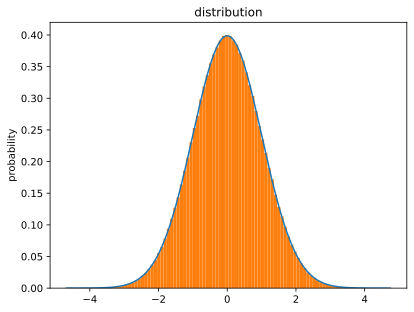

In [144]:
# 根据均值、标准差,求指定范围的正态分布概率值

'''"
normfun(x, mu, sigma) 函数定义了一个正态分布的概率密度函数，
其中 x 是自变量
mu 是均值
sigma 是标准差
这个函数计算了在给定均值和标准差下 x 处的概率密度值。
'''

def normfun(x, mu, sigma):
  pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
  return pdf


# 生成高斯分布的概率密度随机数
result = np.random.normal(0, 1, 1000000) # mean 0 and standard deviation 1

# np.arange()
# 函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1。
# 参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

x = np.arange(min(result), max(result),0.01)

# 设定 y 轴，载入刚才的正态分布函数
y = normfun(x, result.mean(), result.std())
plt.plot(x, y) # 这里画出理论的正态分布概率曲线
 
# 这里画出实际的参数概率与取值关系
fig = plt.hist(result, bins=100, rwidth=1, density=True) # bins=100 表示将数据分成100个柱状图，density=True 表示将频率转换为概率密度。宽度是rwidth(0~1),=1没有缝隙
plt.title('distribution')
#plt.xlabel('')
plt.ylabel('probability')
# 输出
plt.show(); # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷,这里指截取了数据最小值到最大值的分布

# 在日收益率直方图上添加正态分布密度曲线

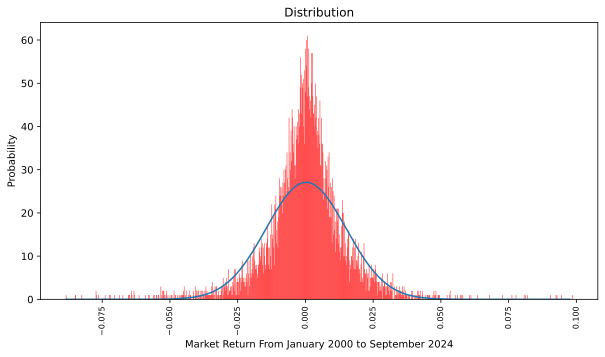

In [147]:
retmean = data_new['2000-01':'2024-09']['Raw_return'].mean()
retstd = data_new['2000-01':'2024-09']['Raw_return'].std()
retmin = data_new['2000-01':'2024-09']['Raw_return'].min()
retmax = data_new['2000-01':'2024-09']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)

fig = plt.hist(data_new['2000-01':'2024-09']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to September 2024')
plt.ylabel('Probability')
plt.show();

# 在月收益率直方图上添加正态分布密

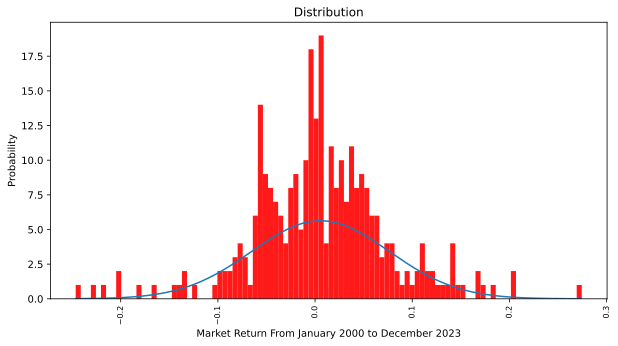

In [148]:
retmean = Month_data['2000-01':'2024-09']['Raw_return'].mean()
retstd = Month_data['2000-01':'2024-09']['Raw_return'].std()
retmin = Month_data['2000-01':'2024-09']['Raw_return'].min()
retmax = Month_data['2000-01':'2024-09']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001)
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5)) # 图片大小 10，5
plt.plot(x, y)

fig = plt.hist(Month_data['2000-01':'2024-09']['Raw_return'],
               bins=100,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to December 2023')
plt.ylabel('Probability')
plt.show();

# 平稳性 stationary
没有时间趋势

In [150]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:', ADF(Month_data['2000-01':'2024-09']['Raw_return']))

原始序列的ADF检验结果为: (-6.0734844967175015, 1.136086777177996e-07, 13, 283, {'1%': -3.453670163592738, '5%': -2.8718077069772248, '10%': -2.5722411158835796}, -690.35040034144)
